In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt

In [2]:
!python -m venv myenv

In [3]:
!pip install opencv-python-headless

In [4]:
!pip install opencv-python-headless matplotlib numpy

In [5]:
img = cv2.imread(r'')

In [6]:
import os

# Paths to the model and image folder
model_prototxt = 'deploy.prototxt'
model_weights = 'mobilenet_iter_73000.caffemodel'
image_folder = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'

# Check if model files and image folder exist
assert os.path.exists(model_prototxt), f"Model prototxt not found at {model_prototxt}"
assert os.path.exists(model_weights), f"Model weights not found at {model_weights}"
assert os.path.exists(image_folder), f"Image folder not found at {image_folder}"

print("All paths are verified and correct!")

All paths are verified and correct!


In [7]:
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


In [8]:
import cv2

# Load the pre-trained model
net = cv2.dnn.readNetFromCaffe(model_prototxt, model_weights)
print("Model loaded successfully!")


Model loaded successfully!


In [9]:
# List available images in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]
print(f"Total images found: {len(image_files)}")
print("Sample image files:", image_files[:5])


Total images found: 4613
Sample image files: ['000000000285.jpg', '000000000632.jpg', '000000000724.jpg', '000000000776.jpg', '000000000785.jpg']


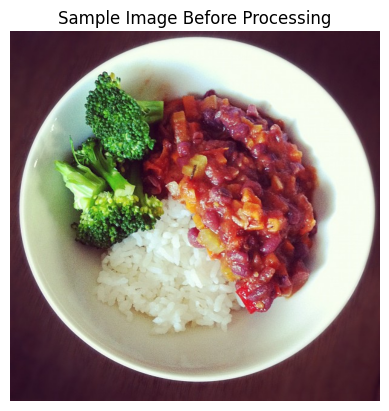

In [10]:
import cv2
import os
import random  # Import the random module
from matplotlib import pyplot as plt

# Define the folder and list of image files
image_folder = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]

# Display a sample image
sample_image_path = os.path.join(image_folder, random.choice(image_files))
sample_img = cv2.imread(sample_image_path)
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img_rgb)
plt.axis('off')
plt.title("Sample Image Before Processing")
plt.show()


### image detection

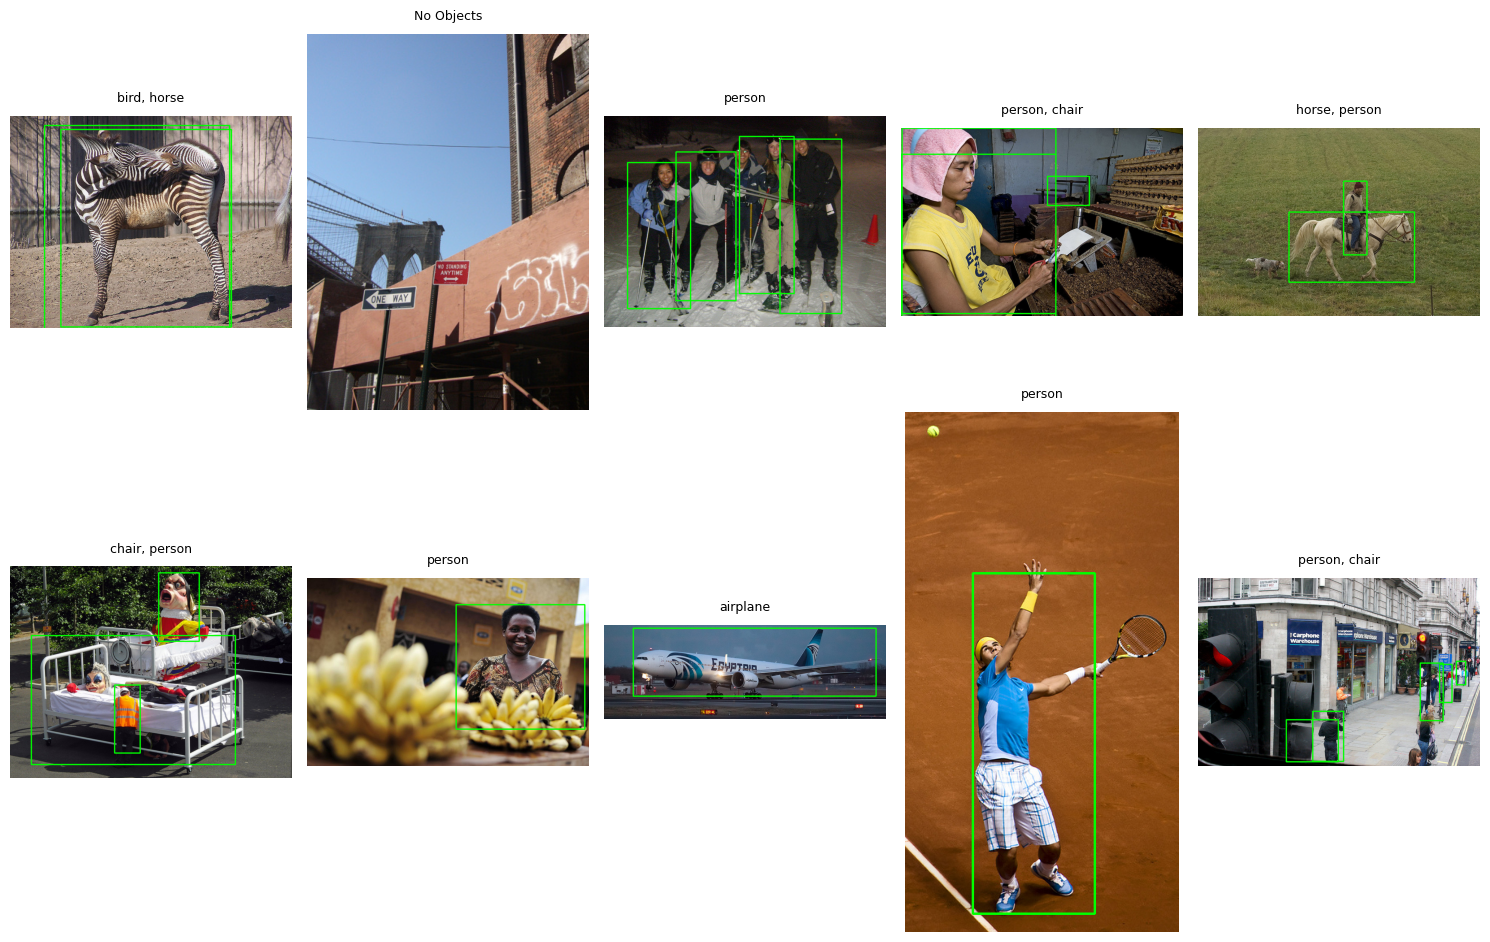

In [11]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

# Load pre-trained MobileNet SSD model
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_iter_73000.caffemodel')

# Folder containing the images
image_folder = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]

# Select 10 random images
random_images = random.sample(image_files, 10)

CLASSES = ['background', 'airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
           'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

# Display the random 10 images with detected objects
plt.figure(figsize=(15, 10))
for idx, image_name in enumerate(random_images):
    # Load the image
    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path)
    h, w = img.shape[:2]
    
    # Prepare the image for DNN model
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    detected_objects = []

    # Iterate over all detections and draw bounding boxes
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:
            class_id = int(detections[0, 0, i, 1])
            label = CLASSES[class_id]
            if label not in detected_objects:
                detected_objects.append(label)
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image and detected objects
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(", ".join(detected_objects) if detected_objects else "No Objects", fontsize=9, pad=10)

plt.tight_layout()
plt.show()


### Resizing

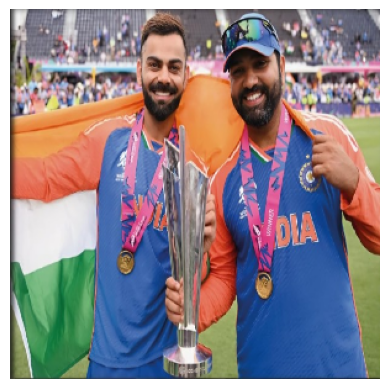

In [12]:
def resize_image(image, width=300, height=300):
    resized_image = cv2.resize(image, (width, height))
    return resized_image

# Define folder and image paths
folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

# Load the image
image = cv2.imread(img_path)
if image is None:
    print("Error: Image not loaded. Check the path or file permissions.")
else:
    # Resize the image
    resized_image = resize_image(image)
    
    # Display the resized image using matplotlib
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

### Blurring 

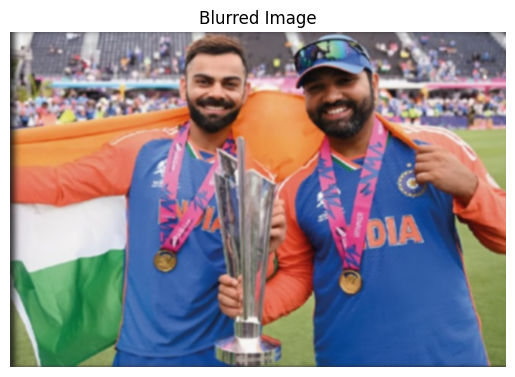

In [13]:
def blur_image(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

image = cv2.imread(img_path)
blurred_image = blur_image(image)

# Display blurred image using matplotlib
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Blurred Image")
plt.show()


### Grayscale Conversion

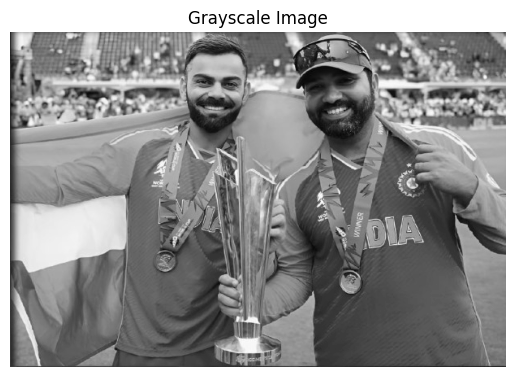

In [14]:
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Folder path and image name
folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

# Read the image
image = cv2.imread(img_path)

# Convert to grayscale
gray_image = convert_to_gray(image)

# Display grayscale image using matplotlib
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()

### Histogram Equalization

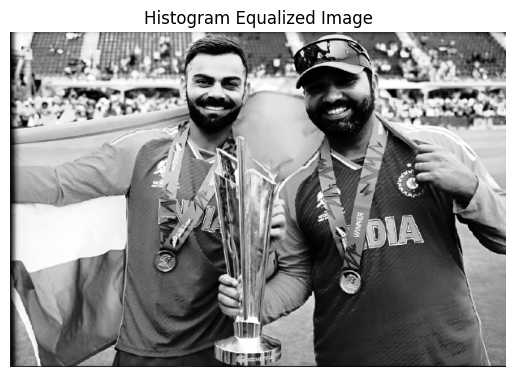

In [15]:
def equalize_histogram(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray_image)

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

image = cv2.imread(img_path)
equalized_image = equalize_histogram(image)

# Display the histogram-equalized image using matplotlib
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Histogram Equalized Image")
plt.show()


### Edge Detection (Canny)

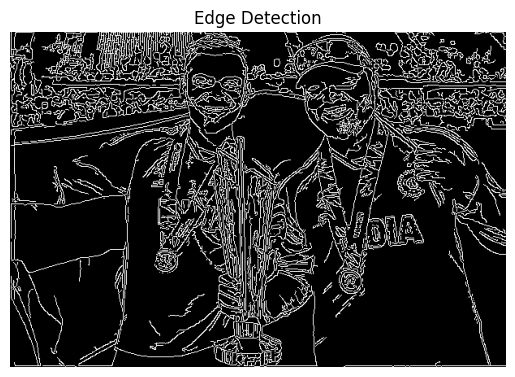

In [16]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)
    return edges

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000612381.jpg'
img_path = os.path.join(folder_path, image_name)

image = cv2.imread(img_path)
edges = detect_edges(image)

# Display the edges using matplotlib
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title("Edge Detection")
plt.show()


### Flip  90,180,270

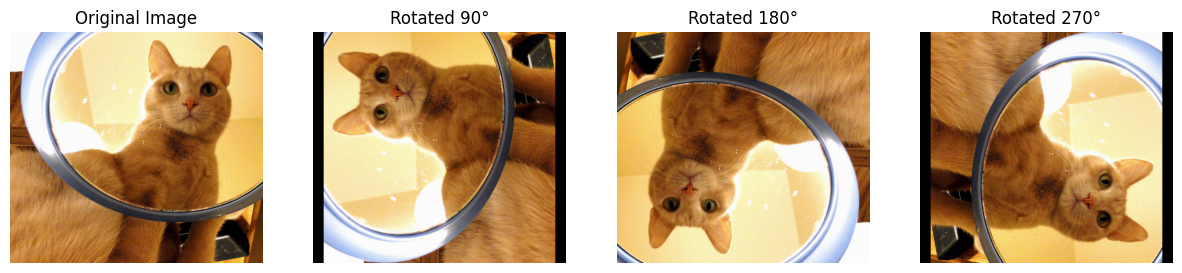

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import os

folder_path = r'C:\Users\DELL\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Infosis Springboard\val2017\val2017'
image_name = '000000063552.jpg'
img_path = os.path.join(folder_path, image_name)

image = Image.open(img_path)

# Rotate the image by 90°, 120°, 180°, and 270°
rotated_90 = image.rotate(90)
rotated_120 = image.rotate(120)
rotated_180 = image.rotate(180)
rotated_270 = image.rotate(270)  # Corrected here

# Display images in Jupyter
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display rotated 90° image
plt.subplot(1, 4, 2)
plt.imshow(rotated_90)
plt.title('Rotated 90°')
plt.axis('off')

# Display rotated 180° image
plt.subplot(1, 4, 3)
plt.imshow(rotated_180)
plt.title('Rotated 180°')
plt.axis('off')

# Display rotated 270° image
plt.subplot(1, 4, 4)
plt.imshow(rotated_270)
plt.title('Rotated 270°')
plt.axis('off')

plt.show()


In [2]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, images, annotations, img_base_url, transform=None):
        self.images = images
        self.annotations = annotations
        self.img_base_url = img_base_url
        self.transform = transform
        self.image_id_to_annotations = self._group_annotations_by_image()

    def _group_annotations_by_image(self):
        image_id_to_annotations = {}
        for ann in self.annotations:
            image_id = ann['image_id']
            if image_id not in image_id_to_annotations:
                image_id_to_annotations[image_id] = []
            image_id_to_annotations[image_id].append(ann)
        return image_id_to_annotations

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_info = self.images[idx]
        folder_name = image_info['folder_name']
        file_name = image_info['file_name']
        img_url = os.path.join(self.img_base_url, folder_name, file_name)
        
        # Fetch the image from the URL
        response = requests.get(img_url)
        image = Image.open(BytesIO(response.content))
        image = np.array(image)
        
        image_id = image_info['id']
        annotations = self.image_id_to_annotations.get(image_id, [])

        boxes = []
        labels = []
        for ann in annotations:
            x, y, width, height = ann['bbox']
            boxes.append([x, y, x + width, y + height])
            labels.append(ann['category_id'])

        boxes = np.array(boxes, dtype=np.float32)
        labels = np.array(labels, dtype=np.int64)

        if self.transform:
            transformed = self.transform(image=image, bboxes=boxes, labels=labels)
            image = transformed['image']
            boxes = transformed['bboxes']
            labels = transformed['labels']

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)

        return image, boxes, labels

img_base_url = 'https://example.com/dataset'

images = [
    {'id': 1, 'folder_name': 'folder1', 'file_name': '000000063552.jpg'},
    {'id': 2, 'folder_name': 'folder2', 'file_name': '000000042122.jpg'},
]

annotations = [
    {'image_id': 1, 'bbox': [50, 60, 100, 120], 'category_id': 3},
    {'image_id': 1, 'bbox': [30, 40, 80, 90], 'category_id': 1},
    {'image_id': 2, 'bbox': [100, 120, 150, 160], 'category_id': 2},
]

dataset = CustomDataset(images=images, annotations=annotations, img_base_url=img_base_url, transform=None)

image, boxes, labels = dataset[0]
print("Image shape:", image.shape)
print("Bounding boxes:", boxes)
print("Labels:", labels)


ModuleNotFoundError: No module named 'torch'

In [3]:
!pip install torch torchvision torchaudio


ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch
